In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import tensorflow as tf
from sklearn import datasets
sess = tf.Session()

Step #50: A=[[2.1173549]], b=[[3.1621575]], Loss=0.42445487
Step #100: A=[[1.9346268]], b=[[3.3908644]], Loss=0.32793042
Step #150: A=[[1.7813222]], b=[[3.6693118]], Loss=0.37605053
Step #200: A=[[1.5562097]], b=[[3.9377859]], Loss=0.29892445
Step #250: A=[[1.319477]], b=[[4.271702]], Loss=0.2732394


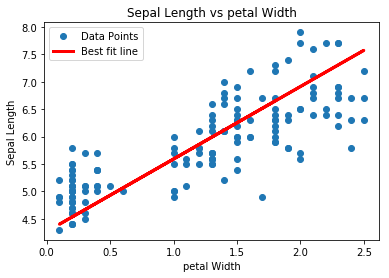

In [3]:
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])
batch_size = 50
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))
model_output = tf.add(tf.matmul(x_data, A), b)

deming_numerator = tf.abs(tf.subtract(y_target, tf.add(tf.matmul(x_data, A), b)))
deming_denominator = tf.sqrt(tf.add(tf.square(A),1))
loss = tf.reduce_mean(tf.truediv(deming_numerator, deming_denominator))

init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(0.1)
train_step = my_opt.minimize(loss)
loss_vec = []
for i in range(250):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1)%50==0:
        print('Step #{}: A={}, b={}, Loss={}'.format(str(i+1), str(sess.run(A)), str(sess.run(b)), str(temp_loss)))

[slope] = sess.run(A)
[y_intercept] = sess.run(b)
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs petal Width')
plt.xlabel('petal Width')
plt.ylabel('Sepal Length')
plt.show()